In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util

import numpy as np
from math import inf
from scipy.optimize import curve_fit
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import time
import pyshtools
import pickle

comment = "Synthetic core with tapered ensemble as prior"
nb_name = "nb_case_core_synthetic_direct_distobs"

In [2]:
shc_g = 30
shc_grid = 30

core = SDSS(comment, N_SH = shc_g, sim_type = "core_ens", sat_height = 350)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([core.grid_phi, 90-core.grid_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = True)
core.generate_map()

# Covariance model

In [3]:
#core.cov_model_taper(r_at = core.r_cmb, tap_to = 500, tap_exp_p1 = 5, tap_exp_p2 = 2,
#                     tap_scale_start = 0, tap_scale_end = 24, plot_taper = True,
#                     save_fig = False, save_string = "case_core_synthetic", save_dpi = 300)

# Source truth

In [4]:
s_source = SDSS(comment, N_SH = shc_g, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_source.grid_glq(nmax = shc_grid, r_at = core.r_cmb)

grid_in = np.array([s_source.grid_phi, 90-s_source.grid_theta]).T
s_source.make_grid(s_source.r_cmb, grid_in, calc_sph_d = False)

s_source.generate_map()

In [5]:
print(s_source)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Synthetic core with tapered ensemble as prior
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             30
N_SH_secondary:   None
sim_type:         core
grid_zero:        (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:   (31,), Max/Min: 0.10 / 0.01
grid_shape:       (2,), Max/Min: 61.00 / 31.00
grid_w:           (1891,), Max/Min: 0.10 / 0.01
grid_radial:      (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:       (1891,), Max/Min: 175.63 / 4.37
grid_phi:         (1891,), Max/Min: 354.10 / 0.00
grid_N:           1891
grid_nmax:        30
r_grid:           3480.0
grid:             (1891, 2)
sph_d:            None
lon:              (1891,), Max/Min: 354.10 / 0.00
lat:              (1891,), Max/Min: 85.63 / -85.63
N_grid:           1891
data:             (1891,)

# Synthetic direct observations

In [6]:
# Load core object
file_pickle = open("nb_case_core_synthetic_direct.obj", 'rb')
core_dobs = pickle.load(file_pickle)
file_pickle.close()


C_e_const = 2.0
#observations_direct_loc = np.random.choice(np.arange(s_source.grid_N),size=512,replace=False)
observations_direct_loc = core_dobs.observations_direct_loc
observations_direct = s_source.data[observations_direct_loc] + np.random.normal(loc=0.0,scale=C_e_const,size=observations_direct_loc.shape)

core_dobs = None

core.observations_direct_loc = observations_direct_loc

In [7]:
print(observations_direct_loc)

[ 192  720 1201  642  959 1366  284 1525 1594  106 1384 1206 1198 1873
  682  457  790  362 1488  178  464 1453  276 1738 1332   69  838  994
 1878  196   95  392 1301  755 1666  977  465  742  146 1559   74 1328
  981 1254 1374  806  889 1536  530  604  688 1187  125 1044 1008  850
 1337  797 1164 1709 1584  181 1025 1303 1404 1855 1124  432 1329  262
 1638  121  444 1583  105  195 1114 1094 1522 1643  553 1654 1158 1165
  120 1512 1732   64 1724  503 1560  151  983 1046  601  427   36  664
 1298  853 1478 1780  287 1432  177  268 1400  109 1267   86 1330  671
  116  599   66  564  170 1672  897 1381 1437 1735  779 1097  823  114
  690    8 1340 1031  693 1822  656  230  691  389  789  904 1748 1521
  782 1853 1252 1564 1727 1872  506 1071 1762  774  951  937 1290  317
  266  398 1543 1173 1831  591  305 1618  555   94  368  623  841  459
 1390  605   88 1550 1119  561    4 1484 1818  366  335  343  965  881
 1567  666 1334  836 1850 1283  770  638  253  978 1614 1705 1482 1226
  887 

<IPython.core.display.Javascript object>


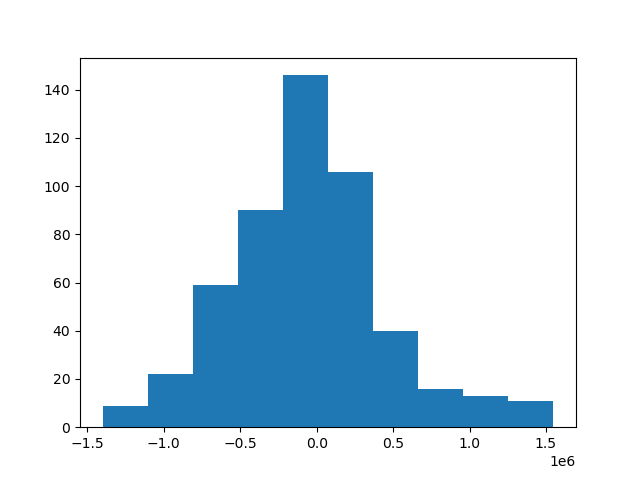

In [8]:
plt.figure()
plt.hist(observations_direct)
plt.show()

In [9]:
shc_g = 30
shc_grid = 30

core_dobs = SDSS(comment, N_SH = shc_g, sim_type = "core_ens", sat_height = 350)

core_dobs.grid_glq(nmax = shc_grid, r_at = core_dobs.r_cmb)

core_dobs.grid_phi = core_dobs.grid_phi[observations_direct_loc]
core_dobs.grid_theta = core_dobs.grid_theta[observations_direct_loc]

grid_in = np.array([core_dobs.grid_phi, 90-core_dobs.grid_theta]).T
core_dobs.make_grid(core_dobs.r_cmb, grid_in, calc_sph_d = True)

core_dobs.data = observations_direct
core_dobs.target_var = np.var(core_dobs.data)

In [10]:
print(core_dobs)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Synthetic core with tapered ensemble as prior
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             30
N_SH_secondary:   None
sim_type:         core_ens
grid_zero:        (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:   (31,), Max/Min: 0.10 / 0.01
grid_shape:       (2,), Max/Min: 61.00 / 31.00
grid_w:           (1891,), Max/Min: 0.10 / 0.01
grid_radial:      (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:       (512,), Max/Min: 175.63 / 4.37
grid_phi:         (512,), Max/Min: 354.10 / 0.00
grid_N:           1891
grid_nmax:        30
r_grid:           3480.0
grid:             (512, 2)
sph_d:            (512, 512)
lon:              (512,), Max/Min: 354.10 / 0.00
lat:              (512,), Max/Min: 85.63 / -85.63
N_grid:           512
data:             (51

____semi-variogram setup___

Number of data used: 262144
Max data distance: 10919.075 km
Lag length chosen: 100.0 km
Number of lags: 109
Number of modelling lags: 51

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


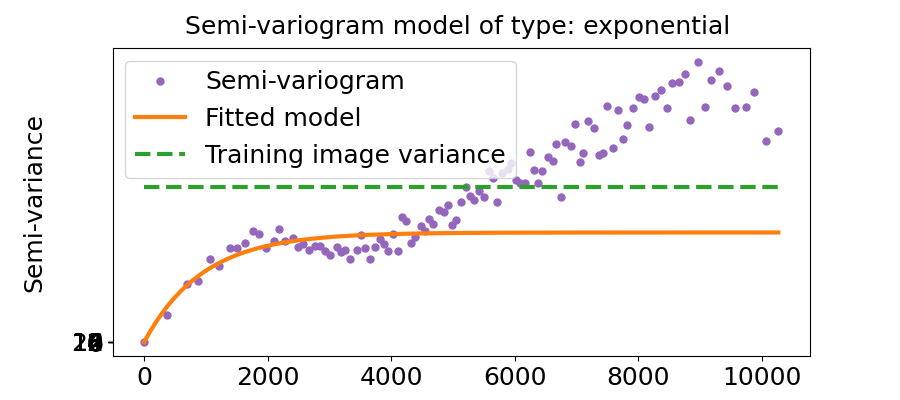

In [37]:
core_dobs.semivar(model_lags = 51, model = "exponential", max_dist = 15000, lag_length = 100,
             zero_nugget = True, hit_target_var = False)

#%% PLOT SEMI-VARIOGRAM
fig = plt.figure(figsize=(9,4), dpi = 100) 
plt.plot(core_dobs.lags,core_dobs.pics,'o', markersize=5,color = 'C4',label='Semi-variogram')
plt.plot(core_dobs.lags_sv_curve,core_dobs.sv_curve,color='C1', linewidth = 3,label='Fitted model')
plt.plot(core_dobs.lags_sv_curve,np.ones(core_dobs.lags_sv_curve.shape)*core_dobs.target_var,linewidth = 3,
         color="C2", linestyle="dashed", label="Training image variance")
plt.ylabel('Semi-variance',fontsize=18,labelpad=18)
plt.xlabel('Lag',fontsize=18,labelpad=18)
plt.yticks(np.arange(0,22,2))
plt.title("Semi-variogram model of type: %s " % core_dobs.model_names[core_dobs.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
#fig.savefig('sv_simple_ex.pdf', bbox_inches='tight', dpi = 300)
plt.show()

In [26]:
print(core_dobs)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Synthetic core with tapered ensemble as prior
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  30
N_SH_secondary:        None
sim_type:              core_ens
grid_zero:             (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:        (31,), Max/Min: 0.10 / 0.01
grid_shape:            (2,), Max/Min: 61.00 / 31.00
grid_w:                (1891,), Max/Min: 0.10 / 0.01
grid_radial:           (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:            (512,), Max/Min: 175.63 / 4.37
grid_phi:              (512,), Max/Min: 354.10 / 0.00
grid_N:                1891
grid_nmax:             30
r_grid:                3480.0
grid:                  (512, 2)
sph_d:                 (512, 512)
lon:                   (512,), M

In [38]:
core.model = core_dobs.model
core.a_sv = core_dobs.a_sv
core.C0 = core_dobs.C0
core.C1 = core_dobs.C1
core.C2 = core_dobs.C2
core.C3 = core_dobs.C3

core.n_lags = core_dobs.n_lags
core.lags = core_dobs.lags
core.pics = core_dobs.pics
core.lags_model = core_dobs.lags_model
core.pics_model = core_dobs.pics_model
core.lags_sv_curve = core_dobs.lags_sv_curve
core.sv_curve = core_dobs.sv_curve

core.find_sort_d(max_dist = 11000)
core.max_cloud = len(core.sort_d)


In [39]:
core.C_sv = core.target_var - core.varioLUT(core.a_sv, core.C0, core.C1, sv_model = core.model)

In [40]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

In [16]:
core.condtab(normsize=10000, quantiles = 200, 
             rangn_lim = 3.5, rangn_N = 501, rangv_lim = 2.0, rangv_N = 101, model_hist = observations_direct)

# System equations

In [41]:
#core.integrating_kernel(s_sat, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)
#core.integrating_kernel(None, C_e_const = C_e_const, C_mm_supply = core.C_ens_tap)

#core.C_ens_tap[observations_direct_loc,observations_direct_loc] += C_e_const
core.C_sv[observations_direct_loc,observations_direct_loc] += C_e_const

In [18]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

# SDSSIM

In [42]:
N_sim = 3
#core.target_var = np.max(core.C_ens_tap) #+ C_e_const

#core.run_sim(N_sim, core.grid_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
#        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = True,
#        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

core.run_sim(N_sim, core.grid_N, core.C_sv, None, None, None,
        None, core.data, 
        observations_direct = observations_direct, observations_direct_loc = observations_direct_loc, 
        observations_direct_e = C_e_const, use_sgs = False,
        scale_m_i = True, unit_d = False, collect_all = True,
        sense_running_error = True, save_string = nb_name, sim_stochastic = False, solve_cho = True)

 |OOOOOOOOOO| 100.0%   realization nr. 0. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 36.857 seconds 
Total elapsed time: 0.614 minutes 
Variance: 280883918945.383
Mean: -31445.636
Max: 1548947.419
Min: -1401200.187
Run nr.: 1

 |OOOOOOOOOO| 100.0%   realization nr. 1. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 34.250 seconds 
Total elapsed time: 1.185 minutes 
Variance: 253132265746.072
Mean: -9154.312
Max: 1548947.419
Min: -1401200.187
Run nr.: 2

 |OOOOOOOOOO| 100.0%   realization nr. 2. Counter: 1891/1891, Running error magnitude: 4.0
Run time: 34.108 seconds 
Total elapsed time: 1.754 minutes 
Variance: 269949951455.332
Mean: -43172.258
Max: 1548947.419
Min: -1401200.187
Run nr.: 3



In [43]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = shc_grid)

In [21]:
#core.semivar(model_lags = "all", model = "exponential", max_dist = 15000, lag_length = 100,
#             zero_nugget = True, hit_target_var = True)
#
#core.model = core_dobs.model
#core.a_sv = core_dobs.a_sv
#core.C0 = core_dobs.C0
#core.C1 = core_dobs.C1
#core.C2 = core_dobs.C2
#core.C3 = core_dobs.C3

In [22]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

<IPython.core.display.Javascript object>


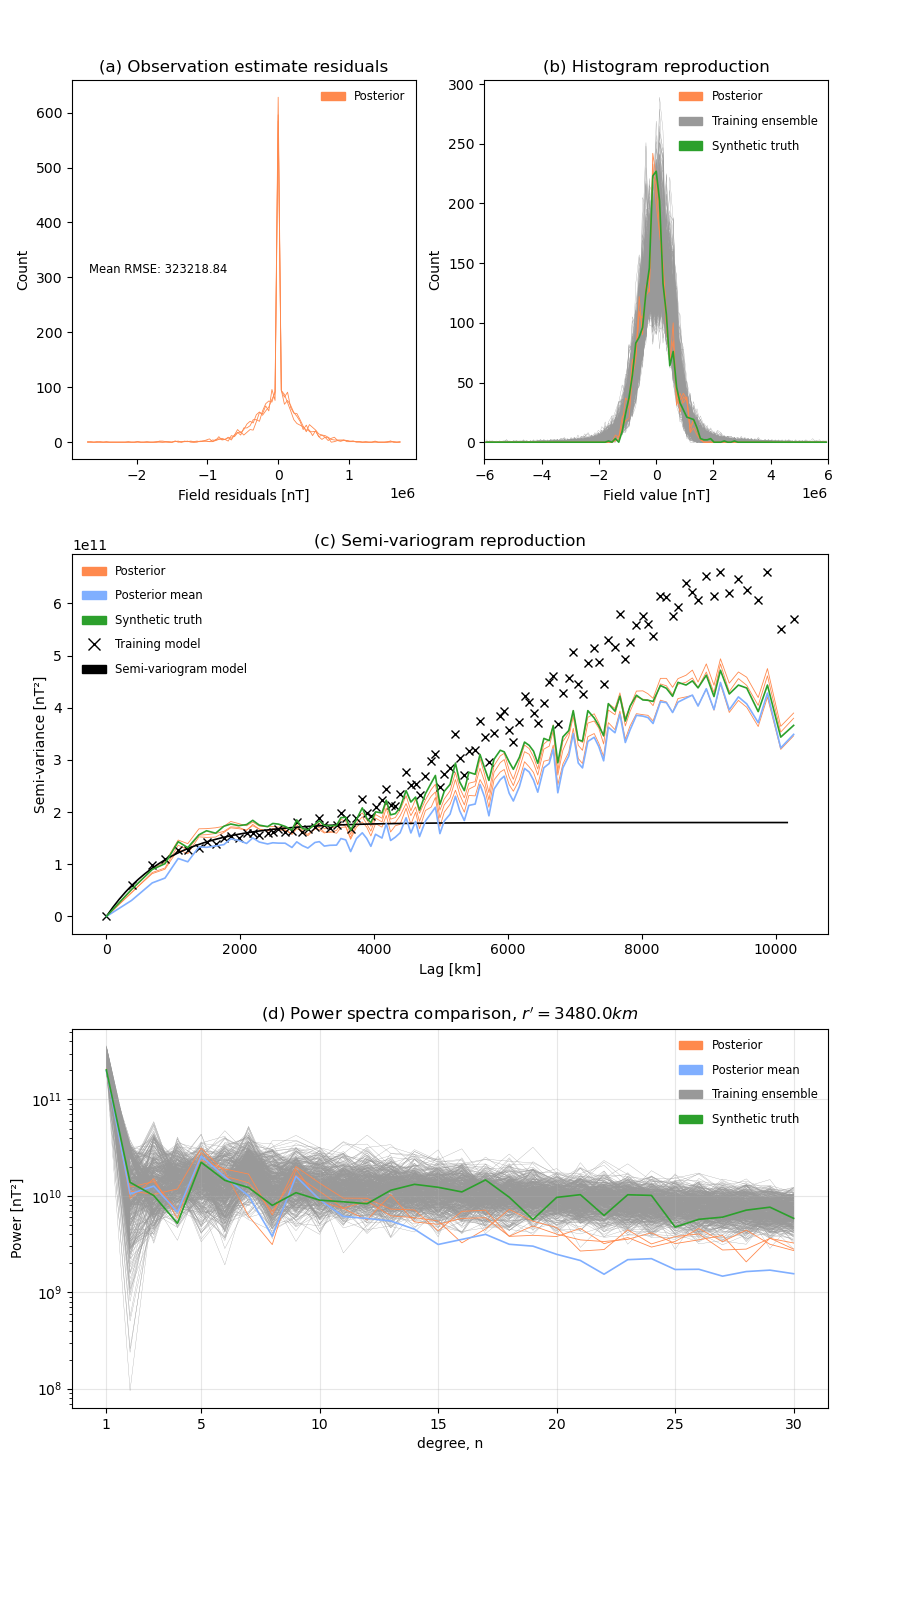

In [44]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

#truth_obj = s_source

core.m_DSS_res = core.m_DSS - s_source.data.reshape(-1,1)

core.grid_glq(nmax = shc_grid, r_at = core.r_cmb)
#m_mode = m_DSS_mode
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = None, truth_obj = s_source,
                              lags_use = 1000, spec_r_at = core.r_cmb, spec_show_differences = False,
                              spec_ti_ens = True, lwidth = 0.6, lwidth_div = 3, lwidth_mult = 2,
                              label_fontsize = "small",
                              res_use = True, sv_use = True, unit_field = "[nT]", hist_ti_ens_limit = [-6*1e6,6*1e6],
                              unit_transform_n_to_m = False, patch_legend = True, ens_prior = True,
                              model_dict = {}, figsize=(9,16), hist_ti_ens = "all", hist_density = False,
                              hist_bins = 101, res_bins = 101, hist_pos_mean = False,
                              left=0.08, bottom=0.12, right=0.92, top=0.95, wspace = 0.2, hspace=0.25,
                              savefig = False, save_string = "case_core_synthetic_sht_direct", 
                              save_dpi = 100, save_path = "images/")

In [47]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

In [16]:
core.grid_glq(nmax = 400, r_at = core.r_cmb)
#core.grid_glq(nmax = 30, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()
#zs_eqa = core.m_DSS
#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()
#zs_mean_eqa = np.mean(core.m_DSS,axis=1)

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_source.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

<IPython.core.display.Javascript object>


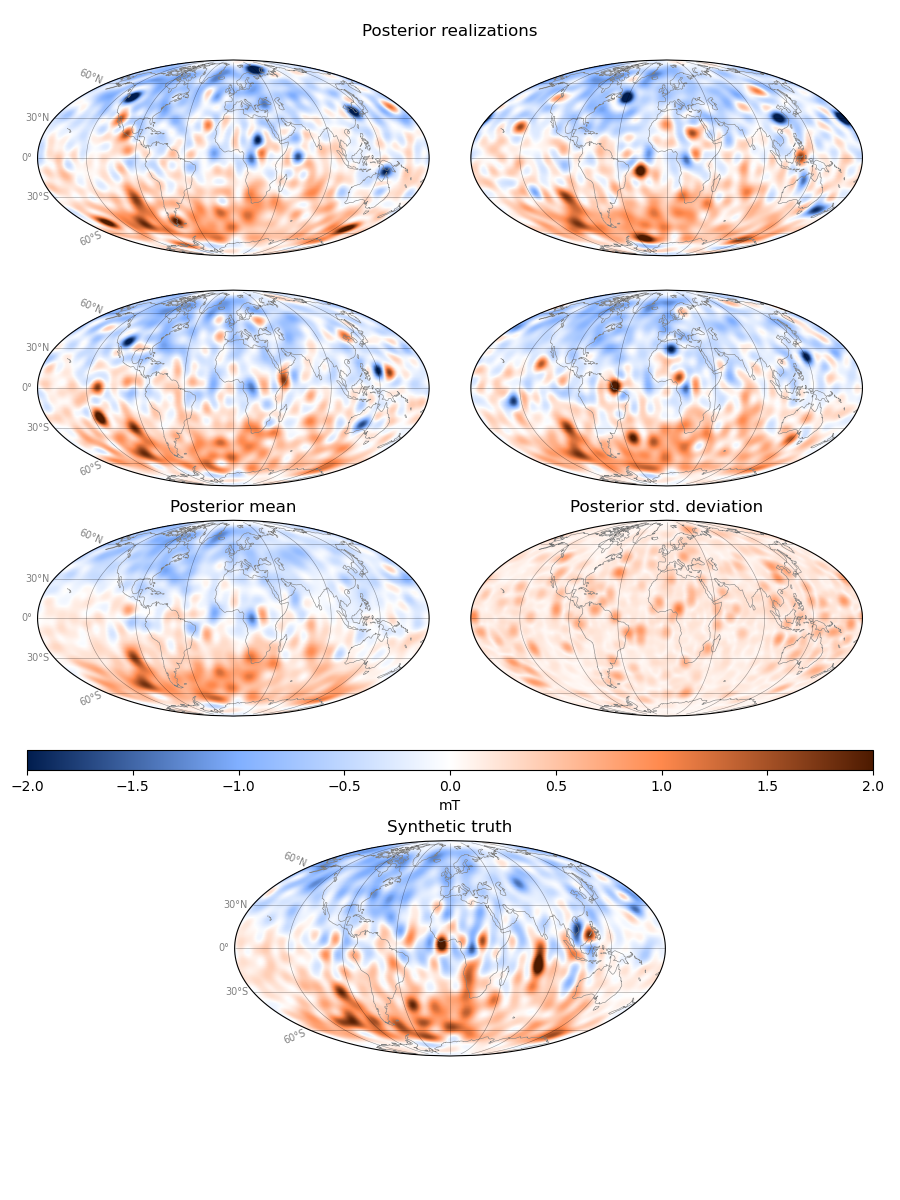

In [17]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 1, cbar_limit = [-2,2],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic_sht", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100,
                        save_path = "images/")


In [14]:
nb_name = "nb_case_core_synthetic_direct"

In [16]:
print(core)


______current attributes______

a:                       6371.2
r_sat:                   6721.2
r_cmb:                   3480.0
rad:                     0.017453292519943295
mu0:                     1.2566370614359173e-06
comment:                 Synthetic core with tapered ensemble as prior
class_abs_path:          /home/mikotz/spherical_direct_sequential_simulation
N_SH:                    30
N_SH_secondary:          None
sim_type:                core_ens
grid_zero:               (31,), Max/Min: 1.00 / -1.00
grid_w_shtools:          (31,), Max/Min: 0.10 / 0.01
grid_shape:              (2,), Max/Min: 61.00 / 31.00
grid_w:                  (1891,), Max/Min: 0.10 / 0.01
grid_radial:             (1891,), Max/Min: 3480.00 / 3480.00
grid_theta:              (1891,), Max/Min: 175.63 / 4.37
grid_phi:                (1891,), Max/Min: 354.10 / 0.00
grid_N:                  1891
grid_nmax:               30
r_grid:                  3480.0
grid:                    (1891, 2)
sph_d:               

In [18]:
del core.C_ens_tap
del core.m_ens
del core.CQF_dist

# SAVE RESULT
print("\nSaving job")
file_pickle = open("{}.obj".format(nb_name), "wb")
pickle.dump(core, file_pickle) #, pickle_protocol=4
file_pickle.close()
print("\nJob saved and finished")


Saving job

Job saved and finished


In [15]:
core.pickle_save_self(nb_name)

AttributeError: G

In [24]:
list_coord = np.array([[0,2], [-30,30], [45,-45], [70,-170]])
list_coord[:,0] = 90 - list_coord[:,0]
list_coord[:,1][list_coord[:,1]<0.0] = 360 + list_coord[:,1][list_coord[:,1]<0.0]

m_coord_sph = np.hstack((90 - core.lat.reshape(-1,1), core.lon.reshape(-1,1)))

idx_min = []
for coord in list_coord:
    idx_min.append(np.sum(np.abs(m_coord_sph - coord),axis=1).argmin())
    
print(idx_min)

m_hists_coord = m_coord_sph[idx_min]

m_hists = core.m_DSS[idx_min,:]

[915, 1225, 480, 215]


In [25]:
left=0.08
bottom=0.12
right=0.92
top=0.95
wspace = 0.2
hspace=0.25

color_rgb_zesty_pos = (1.0,  0.5372549019607843,  0.30196078431372547)
color_rgb_zesty_neg = (0.5019607843137255,  0.6862745098039216,  1.0)

In [ ]:
m_hists_scale = m_hists*10**(-6)

tile_size_row = 2
tile_size_column = 2

label_fontsize = 10

fig = plt.figure(figsize=(9,9)) # Initiate figure with constrained layout
# Generate ratio lists
h_ratio = [1]*tile_size_row
w_ratio = [1]*tile_size_column
gs = fig.add_gridspec(tile_size_row, tile_size_column, height_ratios=h_ratio, width_ratios=w_ratio) # Add x-by-y grid

for i in np.arange(0,list_coord.shape[0]):

    ax = fig.add_subplot(gs[i])
    
    y,binEdges=np.histogram(m_hists_scale[i,:],bins=11,density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])    
    ax.plot(bincenters, y, '-', color = color_rgb_zesty_neg, 
            label='{}'.format(str(np.round(m_hists_coord[i,:],decimals=1))).lstrip('[').rstrip(']'),
            linewidth = 1)

    #ax.set_title('test')
    #ax.annotate("test", (0.05, 0.5), xycoords='axes fraction', va='center', fontsize = label_fontsize)
    ax.set_xlabel("Field value [mT]")
    ax.set_ylabel("PDF")
    ax.legend(loc='best', fontsize = label_fontsize)
    

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

In [13]:
#core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)
core.grid_glq(nmax = 400, r_at = core.r_cmb)

set_nmax = shc_grid

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
core.ensemble_B(s_sat.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble[:,0].copy()

#core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
#lsq_eqa = core.B_ensemble[:,0].copy()

In [ ]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_phi, 90-core.grid_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = None, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 0.1, cbar_mm_factor = 1, cbar_limit = [-1.6,1.6],
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.25, 
                        savefig = False, save_string = "case_core_synthetic", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)
